The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [14]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Start coding here!

In [15]:
df=pd.read_csv("data/nobel.csv",parse_dates=["birth_date","death_date"])

In [16]:
df.tail()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
995,2023,Chemistry,The Nobel Prize in Chemistry 2023,"""for the discovery and synthesis of quantum dots""",1/3,1030,Individual,Louis Brus,1943-00-00,"Cleveland, OH",United States of America,Male,Columbia University,"New York, NY",United States of America,NaT,NaN,NaN
996,2023,Chemistry,The Nobel Prize in Chemistry 2023,"""for the discovery and synthesis of quantum dots""",1/3,1031,Individual,Aleksey Yekimov,1945-00-00,NaN,USSR (now Russia),Male,Nanocrystals Technology Inc.,"New York, NY",United States of America,NaT,NaN,NaN
997,2023,Literature,The Nobel Prize in Literature 2023,"""for his innovative plays and prose which give...",1/1,1032,Individual,Jon Fosse,1959-09-29,Haugesund,Norway,Male,NaN,NaN,NaN,NaT,NaN,NaN
998,2023,Peace,The Nobel Peace Prize 2023,"""for her fight against the oppression of women...",1/1,1033,Individual,Narges Mohammadi,1972-04-21,Zanjan,Iran,Female,NaN,NaN,NaN,NaT,NaN,NaN
999,2023,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having advanced our understanding of wome...",1/1,1034,Individual,Claudia Goldin,1946-00-00,"New York, NY",United States of America,Female,Harvard University,"Cambridge, MA",United States of America,NaT,NaN,NaN


### General info about dataframe

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   year                  1000 non-null   int64         
 1   category              1000 non-null   object        
 2   prize                 1000 non-null   object        
 3   motivation            912 non-null    object        
 4   prize_share           1000 non-null   object        
 5   laureate_id           1000 non-null   int64         
 6   laureate_type         1000 non-null   object        
 7   full_name             1000 non-null   object        
 8   birth_date            968 non-null    object        
 9   birth_city            964 non-null    object        
 10  birth_country         969 non-null    object        
 11  sex                   970 non-null    object        
 12  organization_name     736 non-null    object        
 13  organization_city  

### Summary statistics

In [18]:
df.describe()

,year,laureate_id
count,1000.000000,1000.000000
mean,1973.721000,509.099000
std,34.523195,298.130617
min,1901.000000,1.000000
25%,1949.750000,250.750000
50%,1979.000000,500.500000
75%,2003.000000,764.250000
max,2023.000000,1034.000000


### Handle missing values

In [19]:

df.isna().sum()

year                      0
category                  0
prize                     0
motivation               88
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date               32
birth_city               36
birth_country            31
sex                      30
organization_name       264
organization_city       265
organization_country    265
death_date              404
death_city              421
death_country           415
dtype: int64

In [20]:
# remove less than 5% of minnsing rows in dataframe
precentage=len(df)*.05
col_to_drop=df.columns[df.isna().sum()<=precentage]
df.dropna(subset=col_to_drop,inplace=True)


In [21]:
# numeric column && categoral column 
numcolumn=df.select_dtypes("number")
catcolumn=df.select_dtypes("object")
col_with_missing=df.columns[df.isna().sum()>0]
for i in col_with_missing:
    df[i].fillna(df[i].mode()[0],inplace=True)
df.isnull().sum()


year                    0
category                0
prize                   0
motivation              0
prize_share             0
laureate_id             0
laureate_type           0
full_name               0
birth_date              0
birth_city              0
birth_country           0
sex                     0
organization_name       0
organization_city       0
organization_country    0
death_date              0
death_city              0
death_country           0
dtype: int64

### Handle Duplicates

In [22]:
df.duplicated().sum()

0

In [23]:
for i in catcolumn :
    print("column "+"'"+ i+ "'"+" has "+ str(df[i].nunique())+" unique value")

column 'category' has 6 unique value
column 'prize' has 598 unique value
column 'motivation' has 606 unique value
column 'prize_share' has 4 unique value
column 'laureate_type' has 2 unique value
column 'full_name' has 958 unique value
column 'birth_date' has 943 unique value
column 'birth_city' has 647 unique value
column 'birth_country' has 128 unique value
column 'sex' has 2 unique value
column 'organization_name' has 321 unique value
column 'organization_city' has 194 unique value
column 'organization_country' has 29 unique value
column 'death_city' has 293 unique value
column 'death_country' has 50 unique value


### What is the most commonly awarded gender and birth country?


In [26]:
top_gender=df["sex"].mode()[0]
top_country=df["birth_country"].mode()[0]
print("most commonly awarded gender "+"'"+top_gender+"'" )
print("most commonly awarded birth country "+"'"+top_country+"'" )

most commonly awarded gender 'Male'
most commonly awarded birth country 'United States of America'


### Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?

In [27]:

df["decade"]=np.floor(df["year"]/10)*10
df["decade"]=df["decade"].astype(int)
usborn = df[df["birth_country"] == top_country].groupby("decade")["decade"].count()
totalborn = df.groupby("decade")["decade"].count()
ratio =pd.DataFrame( usborn / totalborn)
ratio.columns=["rate"]
max_rate_index = ratio["rate"].idxmax()
max_decade_usa = int(max_rate_index)
# or 
'''
df['usa_born_winners'] = df['birth_country'] == 'United States of America'
df['decade'] = np.floor(df['year'] / 10) * 10
df['decade'] = df['decade'].astype(int)
ratio = df.groupby('decade', as_index=False)['usa_born_winners'].mean()
max_decade_usa = int(ratio[ratio['usa_born_winners'] == ratio['usa_born_winners'].max()]['decade'].values[0])
'''
print("decade with highest ratio of US-born Nobel Prize winners is "+str(max_decade_usa) )

decade with highest ratio of US-born Nobel Prize winners is 2000


### Which decade and Nobel Prize category combination had the highest proportion of female laureates?

In [30]:

max_female_dict=df[df["sex"]=="Female"]["year"].mode()[0]
usborn = df[df["sex"]=="Female"].groupby(["decade","category"])["decade"].count()
totalborn = df.groupby(["decade","category"])["decade"].count()
prop =pd.DataFrame( usborn / totalborn)
prop.columns=["rate"]
max_female_dict=dict(prop[prop["rate"]==prop["rate"].max()].index.values)
print("decade and Nobel Prize category are "+str(max_female_dict))

decade and Nobel Prize category are {2020: 'Literature'}


###   Nobil_prizes throught dicades 

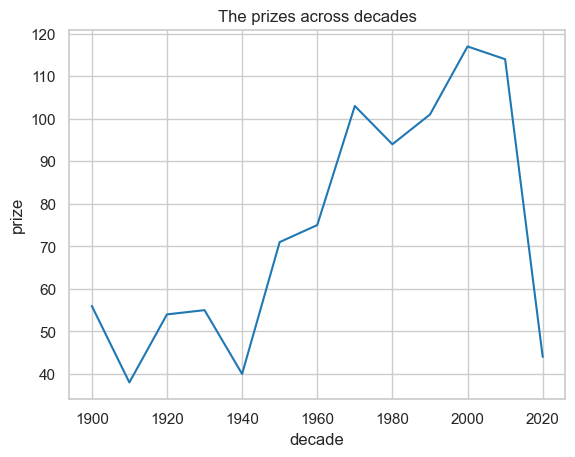

In [65]:
of_prize_per_decade=pd.DataFrame(df.groupby("decade")["prize"].count()).reset_index()
sns.lineplot(x="decade",y="prize",data=of_prize_per_decade)
sns.set_style("whitegrid")
plt.title("The prizes across decades")
plt.show()

### Nobil_prize_categories through decades

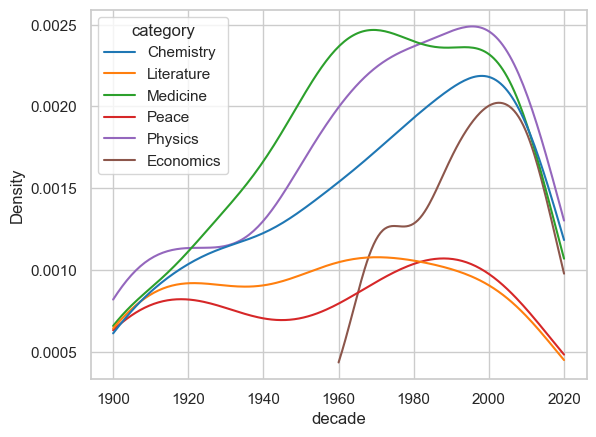

In [66]:
sns.kdeplot(data=df,x="decade",hue="category",cut=0)
plt.title("Nobil_prize_categories through decades")
plt.show()

###  Who was the first woman to receive a Nobel Prize, and in what category?

In [35]:

cond1=df["sex"]=="Female"

first_woman_name=df[cond1].reset_index().sort_values(by="year").loc[0,"full_name"]

first_woman_category=df[cond1].reset_index().sort_values(by="year").loc[0,"category"]
# or 
# nobel[nobel['sex'] == 'Female'].nsmallest(n=1, columns='year')
print("first woman to receive a Nobel Prize is "+"'"+first_woman_name +"'"+ " in "+ first_woman_category )


first woman to receive a Nobel Prize is 'Marie Curie, née Sklodowska' in Physics


### Which individuals or organizations have won more than one Nobel Prize throughout the years?

In [40]:

data=df.groupby("full_name")["prize"].count()
data=pd.DataFrame(data)
repeat_list=list(data[data["prize"]>1].index.values)
# or 
#df.groupby('full_name').filter(lambda winners: len(winners) >= 2)
print("Most frequance winners are "+str(repeat_list))


Most frequance winners are ['Frederick Sanger', 'John Bardeen', 'Linus Carl Pauling', 'Marie Curie, née Sklodowska']


### Count of winner either individual or organization

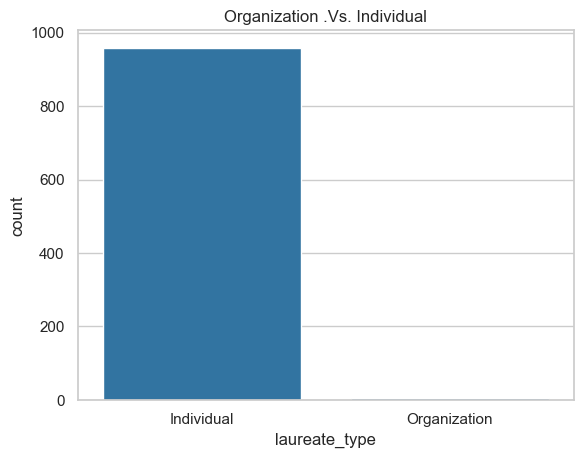

In [69]:

figure=sns.countplot(x="laureate_type",data=df)
figure.set_title("Organization .Vs. Individual")
plt.show()



### category of nobel prize with sex

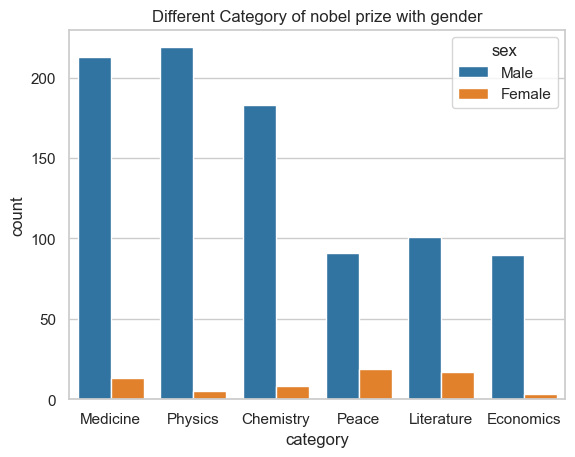

In [70]:

order_list=["Medicine","Physics","Chemistry","Peace","Literature","Economics"]
sns.countplot(x="category",data=df,order=order_list,hue="sex")
plt.title("Different Category of nobel prize with gender")
sns.set_context("notebook")
plt.show()